# Simulated Annealing Demo with Fine Minimum Contours

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def anneal(fun, bounds, options=None, *args):
    cooling_scale = 4
    n_runs = 3
    grid_spacing = 4
    temp_scale = 1
    vectorized = False
    if options:
        if len(options) > 0: cooling_scale = options[0]
        if len(options) > 1: n_runs = options[1]
        if len(options) > 2: grid_spacing = options[2]
        if len(options) > 3: temp_scale = options[3]
        if len(options) > 4: vectorized = options[4]

    bounds = np.array(bounds)
    n_params = bounds.shape[0]
    energy = []
    model = []
    count = 0

    mhat = None
    F = np.inf

    for _ in range(n_runs):
        m = np.random.uniform(bounds[:, 0], bounds[:, 1])
        f = fun(m, *args)
        count += 1
        T = np.std(np.random.normal(0, 1, 1000)) * temp_scale
        for _ in range(100 * cooling_scale):
            m_new = m + np.random.normal(0, (bounds[:, 1] - bounds[:, 0]) / grid_spacing)
            m_new = np.clip(m_new, bounds[:, 0], bounds[:, 1])
            f_new = fun(m_new, *args)
            count += 1
            if f_new < f or np.random.rand() < np.exp(-(f_new - f) / T):
                m, f = m_new, f_new
            energy.append(f)
            model.append(m.copy())
            if f < F:
                F = f
                mhat = m.copy()
            T *= 0.95

    return mhat, F, model, energy, count


In [ ]:
def rosenbrock(x):
    x = np.asarray(x)
    return sum(100.0 * (x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0)


In [ ]:
bounds = [[-2, 2], [-2, 2], [-2, 2]]
options = [4, 3, 4, 1, 0]

mhat, F, model, energy, count = anneal(rosenbrock, bounds, options)
print("Best model:", mhat)
print("Minimum energy:", F)
print("Function evaluations:", count)


Best model: [1.14164511 1.2799293  1.64142087]
Minimum energy: 0.1543184751799423
Function evaluations: 1203


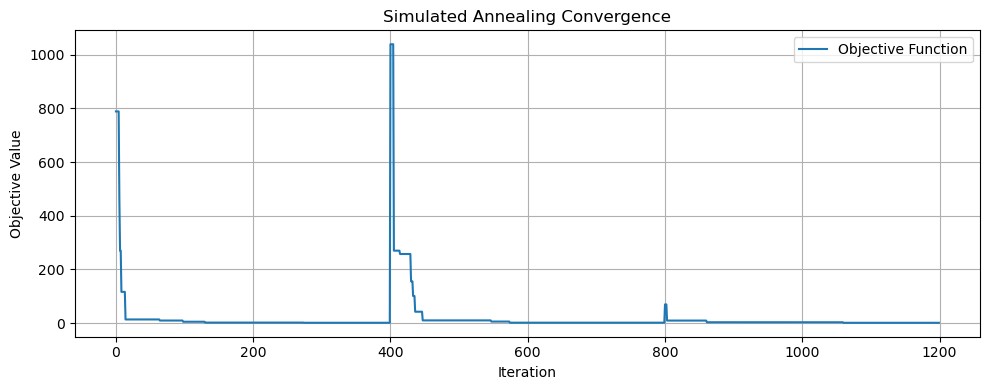

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(energy, label='Objective Function')
plt.xlabel("Iteration")
plt.ylabel("Objective Value")
plt.title("Simulated Annealing Convergence")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


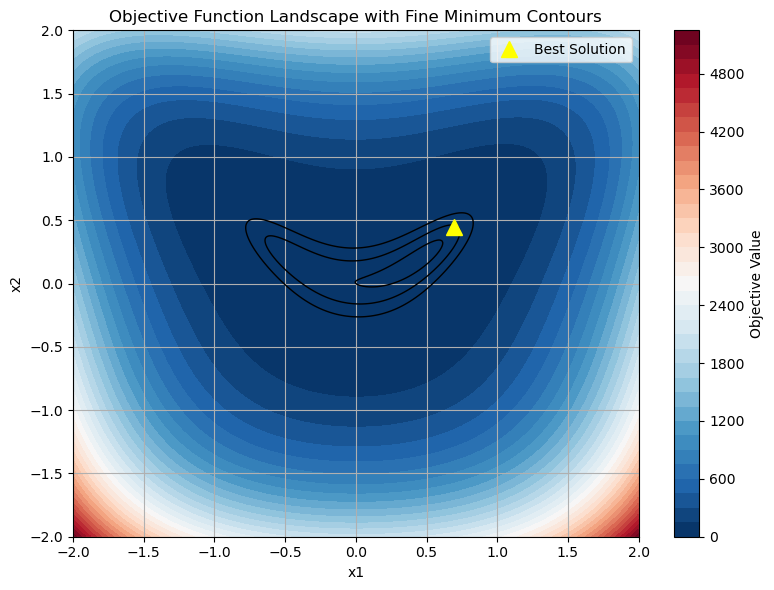

In [ ]:
# Plot the objective function with emphasized contours near minimum
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = rosenbrock([X[i, j], Y[i, j], 0])

plt.figure(figsize=(8, 6))
cs = plt.contourf(X, Y, Z, levels=50, cmap="RdBu_r")
plt.colorbar(label='Objective Value')

# Fine contours around minimum
contour_levels = [0.5, 1, 2, 5, 10]
plt.contour(X, Y, Z, levels=contour_levels, colors='k', linewidths=1.0)

plt.plot(mhat[0], mhat[1], '^', markersize=12, color='yellow', label='Best Solution')
plt.title("Objective Function Landscape with Fine Minimum Contours")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
